#  1. Introduction to SVM 


Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.


# 2. Necessary imports

In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# 3. About the Cancer data

imported from the keggle dataset
#### row-record
#### coloumn-attribute/dimension
#### target-prediction

# 4. Load Data From CSV File 

In [2]:
data= pd.read_csv('rainfall in india 1901-2015.csv')
data.head()
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Null values in the dataset before preprocessing:
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64
Filling null values with mean of that particular column
Mean of data:
YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64
Null values in the dataset after preprocessing:
SUBDIVISION    0
YEAR           0
JAN            

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  r

In [3]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtype

In [4]:
print("Group by:")
data.groupby('SUBDIVISION').size()

Group by:


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [5]:
print("Co-Variance =",data.cov())
print("Co-Relation =",data.corr())

Co-Variance =                 YEAR          JAN          FEB           MAR           APR  \
YEAR     1098.319127   -62.525455   -26.333846     31.608776     17.985597   
JAN       -62.525455  1126.880700   549.299548    627.375837    475.344306   
FEB       -26.333846   549.299548  1288.551221    974.300386    892.111938   
MAR        31.608776   627.375837   974.300386   2201.972143   1766.214414   
APR        17.985597   475.344306   892.111938   1766.214414   4596.594854   
MAY        14.668989   535.377197   896.648721   2094.072720   5433.121872   
JUN      -105.646427  -265.334667   283.409286   1819.002965   7239.347234   
JUL      -144.815256  -465.128448   156.524886   1227.377060   4883.946095   
AUG        40.268753    75.536029   488.385320   1195.021166   3275.971621   
SEP       -29.893921   110.216877   388.537697   1133.597551   3507.500523   
OCT         7.922814    41.252990   -16.324506    401.044464   2478.380760   
NOV       -42.624271   154.517515   -57.342083    

C:\Users\Yogesh Mishra\AppData\Local\Temp\ipykernel_28160\2980793991.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Co-Variance =",data.cov())
C:\Users\Yogesh Mishra\AppData\Local\Temp\ipykernel_28160\2980793991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Co-Relation =",data.corr())


In [6]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)

Index of correlation columns: Index(['ANNUAL', 'Jun-Sep', 'JUN', 'JUL', 'AUG', 'SEP', 'MAY', 'Mar-May',
       'OCT', 'APR', 'Oct-Dec', 'MAR', 'NOV', 'DEC', 'FEB', 'Jan-Feb', 'JAN',
       'YEAR'],
      dtype='object')


C:\Users\Yogesh Mishra\AppData\Local\Temp\ipykernel_28160\195724475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]


Scatter plot of annual and january attributes


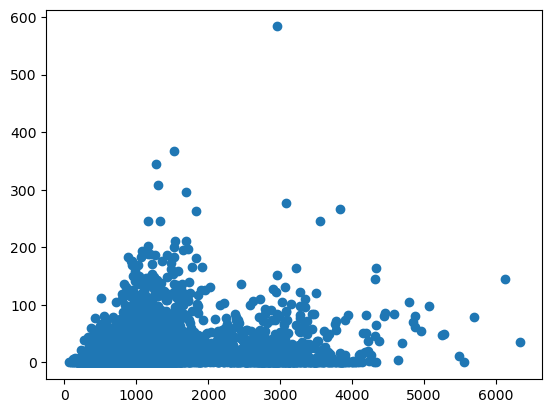

In [7]:
print("Scatter plot of annual and january attributes")
plt.scatter(data.ANNUAL,data.JAN)

Box Plot of annual rainfall data in years 1901-2015


<Axes: >

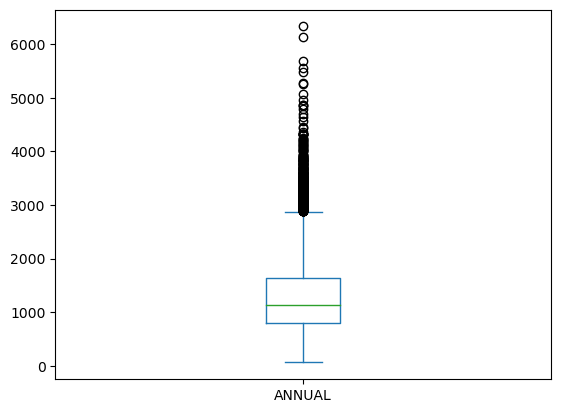

In [8]:
print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


<Axes: >

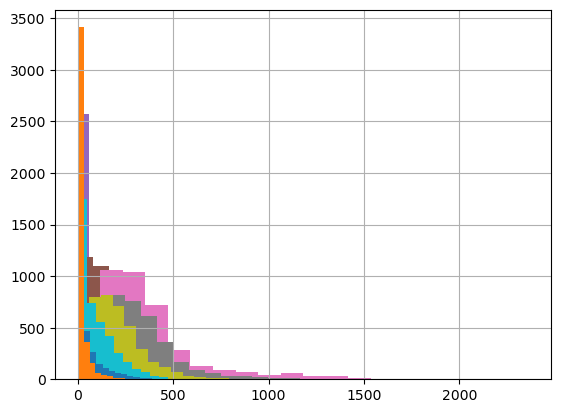

In [9]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

Histogram showing the annual rainfall of the all states:


<Axes: >

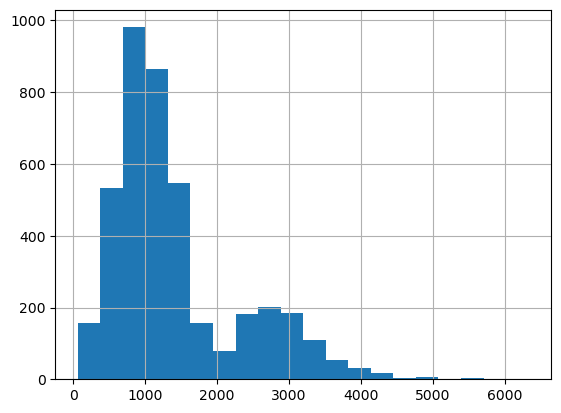

In [10]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)

In [11]:
d2=data.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'],axis=1)
k=((d2.head().sum()))
month=list(d2.head())
print("Months are: ",month)
print(k)

Months are:  ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
JAN      72.6
FEB     405.6
MAR      44.7
APR     232.6
MAY    1794.0
JUN    2658.3
JUL    2193.1
AUG    2052.1
SEP    2455.2
OCT    1249.8
NOV    1535.7
DEC     803.9
dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['Year','Month']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[i:i+3]
        y = division_data[i+3]
    else:
        X = np.concatenate((X, division_data[i:i+3]), axis=0)
        y = np.concatenate((y, division_data[i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [45]:
from sklearn import svm
from sklearn.svm import SVR
classifier=SVR(kernel='rbf',gamma=40, C=2)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)

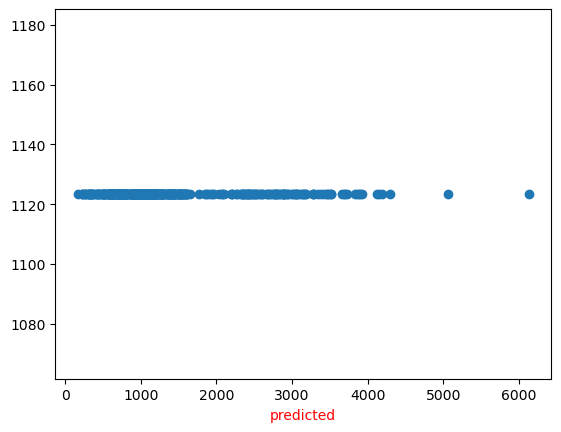

In [46]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual", color='r')
plt.xlabel("predicted")
plt.show()

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import brier_score_loss

In [48]:
mean_squared_error(y_test, y_predict)

1028411.2558637158

In [49]:
r2_score(y_test, y_predict)

-0.11901727045255805

In [50]:
mean_absolute_error(y_test, y_predict)

685.3481901803422

# 5. Distribution of the classes

# 6. Selection of unwanted columns

# 7. Remove unwanted columns

# 8. Divide the data as Train/Test dataset

# 9. Modeling (SVM with Scikit-learn)

# 10. Evaluation (Results)}